In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats


In [7]:
df1 = pd.read_csv('EnSu.csv')
df2 = pd.read_csv('EcSu.csv')
df3 = pd.read_csv('HuSu.csv')
df4 = pd.read_csv('SoSu.csv')

df_combined = pd.concat([df1, df2, df3, df4], axis=0)

df_combined.reset_index(drop=True, inplace=True)

df_combined

,Post Title,Author,Score,Comments Count,Post ID,Post URL,Created Date,Subreddit,Post Text,Subscribers,Link Karma,Comment Karma,Cleaned Post Text,Sentiment Scores,Compound,Sentiment,Log Score
0,"Earth, society and sustainability in LAS vs na...",my3rdthrowawayiguess,4,11,caozqo,https://www.reddit.com/r/UIUC/comments/caozqo/...,2019-07-08 20:38:00,UIUC,I am a rising HS senior who is deciding what I...,95638,21,8,rising h senior deciding want major atm know w...,"{'neg': 0.11, 'neu': 0.712, 'pos': 0.178, 'com...",0.0258,neutral,1.609438
1,"Ah yes, the cattle industry. The best example ...",TheRealHogshead,15585,511,145ew91,https://i.redd.it/jbm8k1c4r15b1.jpg,2023-06-09 21:49:30,terriblefacebookmemes,NaN,2209670,47323,12170,n,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,neutral,9.654128
2,Researchers describe in a paper how growing al...,giuliomagnifico,29178,724,y0e1sr,https://news.cornell.edu/stories/2022/10/onsho...,2022-10-10 14:53:01,science,NaN,32955816,3215569,193399,n,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,neutral,10.281205
3,Chemists developed two sustainable plastic alt...,mvea,71985,1115,lo5vco,https://academictimes.com/new-plant-based-plas...,2021-02-20 13:09:12,science,NaN,32955816,30008797,403085,n,"{'neg': 0.0, 'neu': 0.0, 'pos': 0.0, 'compound...",0.0000,neutral,11.184227
4,YSK if you're thinking about hoarding toilet p...,Assume_Utopia,32194,1543,feurlv,https://www.reddit.com/r/YouShouldKnow/comment...,2020-03-07 13:54:42,YouShouldKnow,"Actually, just get one no matter what. I was s...",5419395,25913,71461,actually get one matter sceptical first worth ...,"{'neg': 0.056, 'neu': 0.615, 'pos': 0.328, 'co...",0.8625,positive,10.379566
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
856,AskScience AMA Series: We are climate scientis...,AskScienceModerator,4147,559,7bsv2d,https://www.reddit.com/r/askscience/comments/7...,2017-11-09 13:00:08,askscience,"Hi! We are Seth Wynes and Kimberly Nicholas, a...",25716887,733645,1739,hi seth wynes kimberly nicholas author recent ...,"{'neg': 0.015, 'neu': 0.86, 'pos': 0.124, 'com...",0.9816,positive,8.330382
857,Did you guys ever have to participate in socia...,maltyjam,3,4,1d2gspn,https://www.reddit.com/r/auscorp/comments/1d2g...,2024-05-28 13:05:10,auscorp,I was volun-told to be in a committee that foc...,52726,1077,101,volun told committee focus sustainability soci...,"{'neg': 0.0, 'neu': 0.884, 'pos': 0.116, 'comp...",0.5688,positive,1.386294
858,India’s rise in football has begun and here’s ...,Party-Bet-4003,2279,135,14okvh3,https://www.reddit.com/r/india/comments/14okvh...,2023-07-02 12:19:43,india,India doing well in football has been a quiet ...,2442361,18667,16307,india well football quiet dream million countr...,"{'neg': 0.098, 'neu': 0.599, 'pos': 0.304, 'co...",0.9987,positive,7.731931
859,People in relationships deserve to have friend...,Casiaa_,4705,332,d1a47a,https://www.reddit.com/r/offmychest/comments/d...,2019-09-08 14:08:14,offmychest,I've been looking to make new friends on disco...,3250818,8111,7458,looking make new friend discord reddit swear g...,"{'neg': 0.145, 'neu': 0.517, 'pos': 0.339, 'co...",0.9817,positive,8.456594


Correlation between the number of members (subscribers) and the average score: 0.3127063478896089


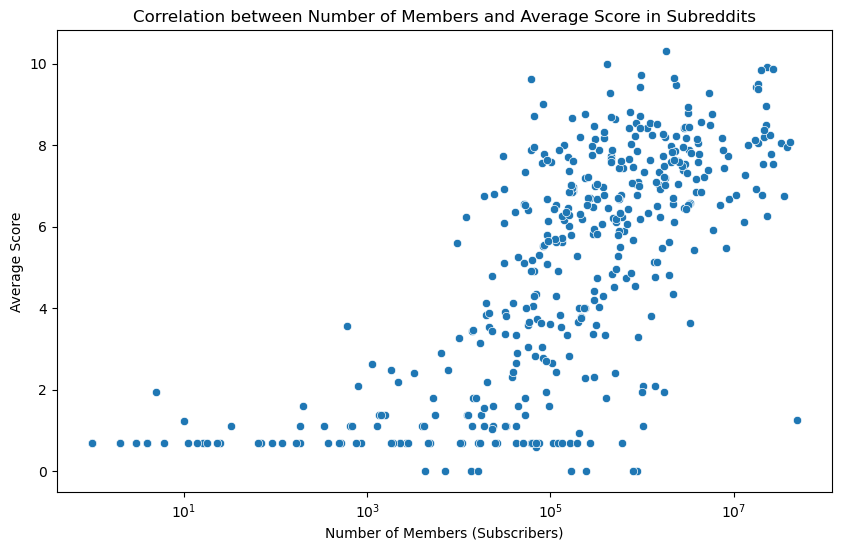

Correlation coefficient: 0.3127
t-statistic: 9.6489
p-value: 0.0000
The correlation is significant (p < 0.05)


In [38]:
subreddit_stats = df_combined.groupby('Subreddit').agg(
    num_posts=('Post ID', 'count'),
    avg_score=('Log Score', 'mean'),
    subscribers=('Subscribers', 'first'),
    avg_log=('Log Score', 'mean')# Get the subscriber count for each subreddit
).reset_index()

# Investigate the correlation between the number of members and the average score
correlation = subreddit_stats['subscribers'].corr(subreddit_stats['avg_score'])

# Display the correlation
print(f"Correlation between the number of members (subscribers) and the average score: {correlation}")

# Plot the relationship between number of members and average score
plt.figure(figsize=(10,6))
sns.scatterplot(x='subscribers', y='avg_score', data=subreddit_stats)
plt.title('Correlation between Number of Members and Average Score in Subreddits')
plt.xlabel('Number of Members (Subscribers)')
plt.ylabel('Average Score')
plt.xscale('log')  # Use log scale for subscribers if the range is wide
plt.show()

n = len(df_combined)

# Calculate the t-statistic
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))

# Calculate the p-value
p_value = stats.t.sf(np.abs(t_stat), df=n-2) * 2  # two-tailed test

# Output the results
print(f"Correlation coefficient: {correlation:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print(f"The correlation is significant (p < {alpha})")
else:
    print(f"The correlation is not significant (p ≥ {alpha})")

Correlation between the number of posts and the average score: 0.20641264301955026


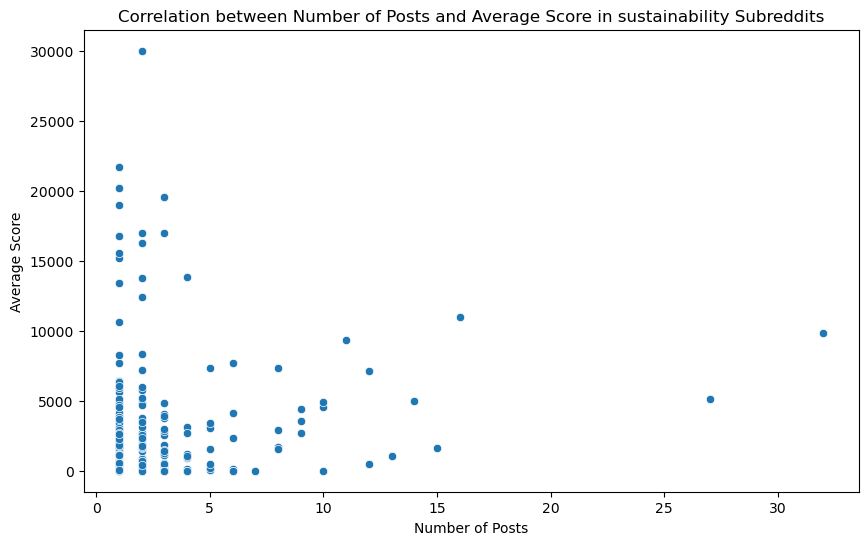

Correlation coefficient: 0.2064
t-statistic: 6.1828
p-value: 0.0000
The correlation is significant (p < 0.05)


In [46]:
subreddit_stats = df_combined.groupby('Subreddit').agg(
    num_posts=('Post ID', 'count'),
    avg_score=('Score', 'mean'),
    avg_log=('Log Score', 'mean')
).reset_index()

# Investigate the correlation between the number of posts and the average score
correlation = subreddit_stats['num_posts'].corr(subreddit_stats['avg_score'])

# Display the correlation
print(f"Correlation between the number of posts and the average score: {correlation}")

# Plot the relationship between number of posts and average score
plt.figure(figsize=(10,6))
sns.scatterplot(x='num_posts', y='avg_score', data=subreddit_stats)
plt.title('Correlation between Number of Posts and Average Score in sustainability Subreddits')
plt.xlabel('Number of Posts')
plt.ylabel('Average Score')
plt.show()

# Calculate the t-statistic
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))

# Calculate the p-value
p_value = stats.t.sf(np.abs(t_stat), df=n-2) * 2  # two-tailed test

# Output the results
print(f"Correlation coefficient: {correlation:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print(f"The correlation is significant (p < {alpha})")
else:
    print(f"The correlation is not significant (p ≥ {alpha})")

In [86]:
author_stats = df_combined.groupby('Author').agg(
    avg_link_karma=('Link Karma', 'mean'),  # Average link karma by each author
    avg_score=('Score', 'mean')             # Average score of posts by the author
).reset_index()

top_10_authors = author_stats.sort_values(by='avg_link_karma', ascending=False).head(10)

author_post_count = df_combined.groupby('Author').size().reset_index(name='Num_Posts')

author_avg_score = df_combined.groupby('Author')['Score'].mean().reset_index(name='Avg_Score')

author_stats = pd.merge(author_post_count, author_avg_score, on='Author')

n = len(author_stats)

pearson_corr, pearson_p_value = stats.pearsonr(author_stats['Num_Posts'], author_stats['Avg_Score'])

t_stat_pearson = pearson_corr * np.sqrt((n - 2) / (1 - pearson_corr**2))
p_value_ttest_pearson = stats.t.sf(np.abs(t_stat_pearson), df=n-2) * 2  # two-tailed test

print(f"Pearson's Correlation: {pearson_corr:.4f}, p-value: {pearson_p_value:.4f}")
print(f"Pearson's Correlation t-statistic: {t_stat_pearson:.4f}, p-value: {p_value_ttest_pearson:.4f}")

alpha = 0.05  # significance level
if p_value_ttest_pearson < alpha:
    print(f"The Pearson correlation is significant (p < {alpha})")
else:
    print(f"The Pearson correlation is not significant (p ≥ {alpha})")

Pearson's Correlation: 0.0352, p-value: 0.3606
Pearson's Correlation t-statistic: 0.9148, p-value: 0.3606
The Pearson correlation is not significant (p ≥ 0.05)


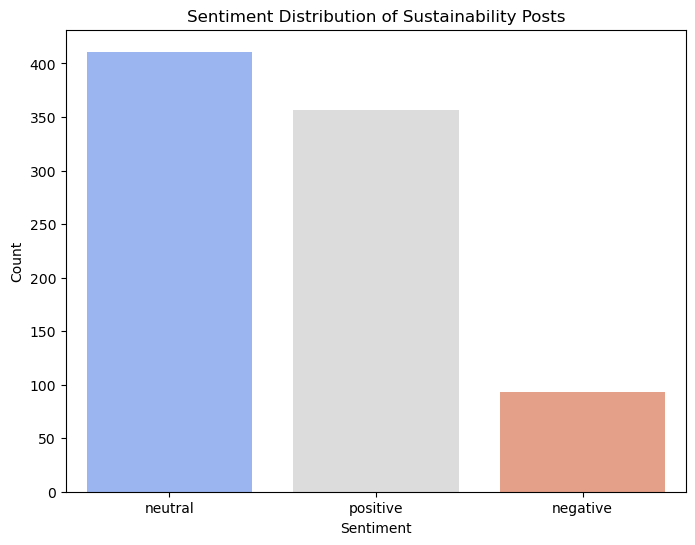

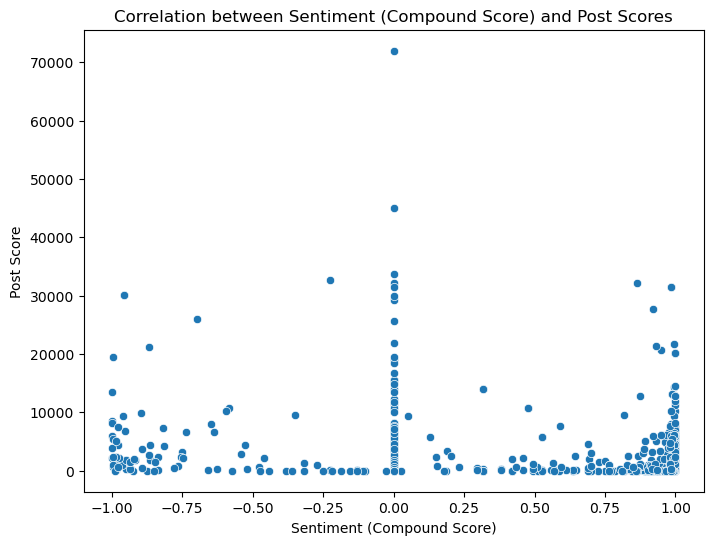

Correlation between sentiment (compound score) and post scores: -0.00
Correlation coefficient: -0.0042
t-statistic: -0.1082
p-value: 0.9138
The correlation is not significant (p ≥ 0.05)


In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Sentiment', data=df_combined, palette='coolwarm')
plt.title('Sentiment Distribution of Sustainability Posts')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Compound', y='Score', data=df_combined)
plt.title('Correlation between Sentiment (Compound Score) and Post Scores')
plt.xlabel('Sentiment (Compound Score)')
plt.ylabel('Post Score')
plt.show()
correlation = df_combined['Compound'].corr(df_combined['Score'])
print(f'Correlation between sentiment (compound score) and post scores: {correlation:.2f}')

# Calculate the t-statistic
t_stat = correlation * np.sqrt((n - 2) / (1 - correlation**2))

# Calculate the p-value
p_value = stats.t.sf(np.abs(t_stat), df=n-2) * 2  # two-tailed test

# Output the results
print(f"Correlation coefficient: {correlation:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the p-value
alpha = 0.05
if p_value < alpha:
    print(f"The correlation is significant (p < {alpha})")
else:
    print(f"The correlation is not significant (p ≥ {alpha})")

In [79]:
author_avg_score = df_combined.groupby('Author')['Score'].mean().reset_index()
author_avg_score.columns = ['Author', 'Avg_Score']

author_karma_data = df_combined[['Author', 'Link Karma', 'Comment Karma']].drop_duplicates()

author_stats = pd.merge(author_avg_score, author_karma_data, on='Author', how='inner')

link_karma_corr = author_stats['Avg_Score'].corr(author_stats['Link Karma'])

n = len(author_stats)  

t_stat = link_karma_corr * np.sqrt((n - 2) / (1 - link_karma_corr**2))

p_value = stats.t.sf(np.abs(t_stat), df=n-2) * 2

print(f"Correlation coefficient: {link_karma_corr:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"p-value: {p_value:.4f}")

alpha = 0.05  
if p_value < alpha:
    print(f"The correlation is significant (p < {alpha})")
else:
    print(f"The correlation is not significant (p ≥ {alpha})")

Correlation coefficient: 0.2532
t-statistic: 6.9003
p-value: 0.0000
The correlation is significant (p < 0.05)


In [82]:
comment_karma_corr = author_stats['Avg_Score'].corr(author_stats['Comment Karma'])

t_stat_comment = comment_karma_corr * np.sqrt((n - 2) / (1 - comment_karma_corr**2))
p_value_comment = stats.t.sf(np.abs(t_stat_comment), df=n-2) * 2  

print(f"Comment Karma Correlation: {comment_karma_corr:.4f}")
print(f"Comment Karma t-statistic: {t_stat_comment:.4f}")
print(f"Comment Karma p-value: {p_value_comment:.4f}")

if p_value_comment < alpha:
    print(f"The correlation with Comment Karma is significant (p < {alpha})")
else:
    print(f"The correlation with Comment Karma is not significant (p ≥ {alpha})")

Comment Karma Correlation: 0.1601
Comment Karma t-statistic: 4.2765
Comment Karma p-value: 0.0000
The correlation with Comment Karma is significant (p < 0.05)


KeyError: 'Link Karma'

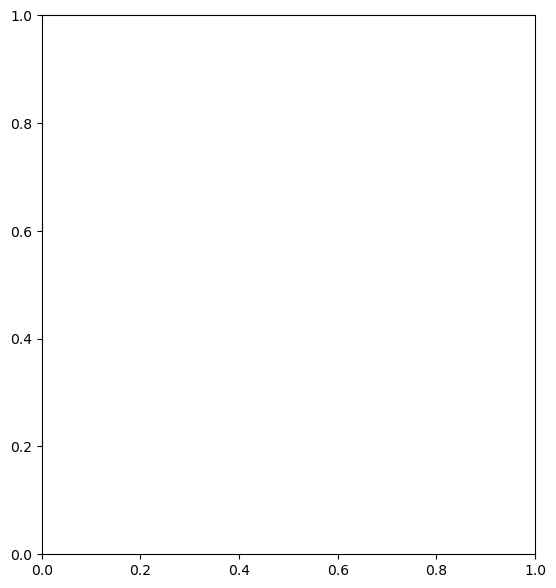

In [89]:
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
sns.regplot(x='Link Karma', y='Avg_Score', data=author_stats, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Average Score vs Link Karma')
plt.xlabel('Link Karma')
plt.ylabel('Average Score')

plt.subplot(1, 2, 2)
sns.regplot(x='Comment Karma', y='Avg_Score', data=author_stats, scatter_kws={'s': 50}, line_kws={'color': 'red'})
plt.title('Average Score vs Comment Karma')
plt.xlabel('Comment Karma')
plt.ylabel('Average Score')

plt.tight_layout()
plt.show()